In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Data Description: 
The dataset used will be players.csv. it has 7 variables and 195 observations. 

variables include the players's: 

1. game experience (categorical)
includes a categorized "experience level" of each individual. (ex. Pro, Veteran, Regular, Beginner) 

3. subscription (categorical)
TRUE or FALSE statement about whether the player is subscribed to a game-related newsletter

4. thier hashed email (identifier/categorical)
unique identifer for each player

5. played hours (quantitative)
playtime of minecraft in hours. 

6. name (categorical)
The real name of the player. ex.(John)

7. gender (categorical)
Gender (Male/Female) 

8. age (quantitative)

Issues:
variables like experience may be subjective. 
Population and distribution differences between genders may cause skewing
Players with zero playtime should be excluded or minimized to prevent skewing.
hashedEmail and name irrelevant for predicting.

In [9]:
players<-read_csv("players.csv")|> 
glimpse()
summary(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               


Broad question: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

formulated question: Can a player's experience level predict the total number of hours played in the players.csv dataset?

This can be accomplished by using linear regression: first using the select() function to select all relavent variables: experience level and playtime. Then filter out all played_hours==0 to remove outliers and focus on active players. Then, use as.factor on categorical variables. Then scale and center all quantitative variables, create training and testing sets to perform linear regression. 

The exploratory bar plot shows that experience level strongly relates to total playtime, with “Regular” players playing the most on average.
This supports building a linear regression model where played_hours is primarily explained by experience.

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


experience,gender,played_hours
<fct>,<fct>,<dbl>
Pro,Male,30.3
Veteran,Male,3.8
Amateur,Female,0.7
Regular,Male,0.1
Amateur,Male,0.1
Veteran,Female,1.6
Beginner,Female,1.5
Amateur,Male,0.2
Amateur,Female,48.4


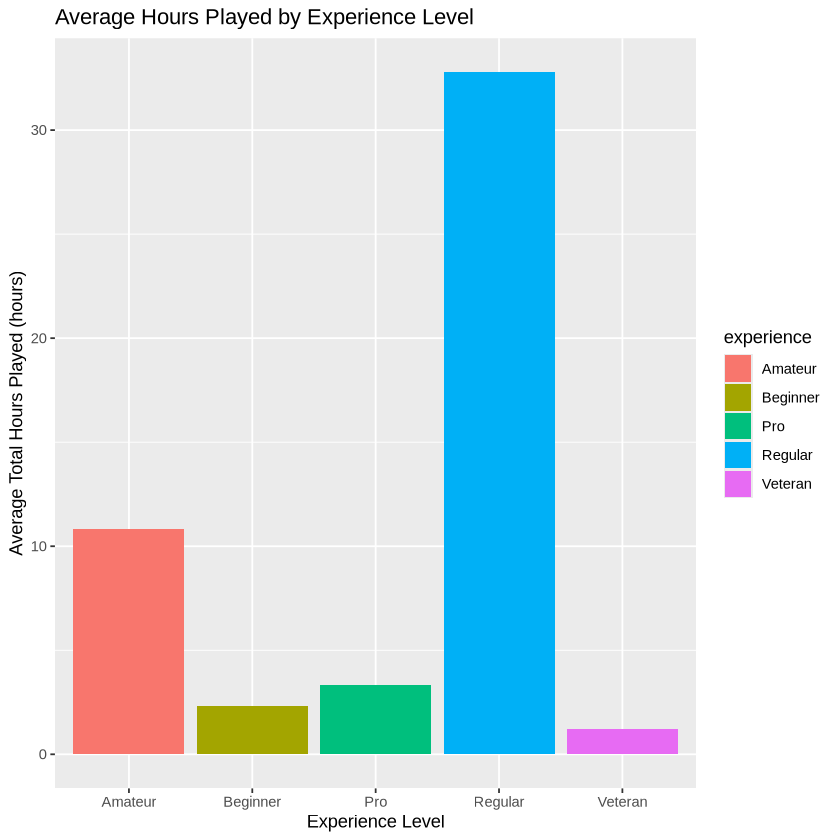

In [30]:
#mean table
mean_table <- players |>
  summarise(across(where(is.numeric), ~mean(.x, na.rm = TRUE)))
mean_table


players_tidy <- players |>
  select(experience, gender, played_hours)|>
    filter(played_hours > 0)
#tidy data
players_tidy <- players_tidy |>
  mutate(experience = as.factor(experience),
    gender = as.factor(gender),
    played_hours = as.numeric(played_hours) )
players_tidy
# mean experience 
mean_experience <- players_tidy|>
  group_by(experience)|>
  summarise(mean_played = mean(played_hours, na.rm = TRUE))

# Bar plot experience
ggplot(mean_experience, aes(x = experience, y = mean_played, fill = experience)) +
  geom_col() +
  labs(
    title = "Average Hours Played by Experience Level",
    x = "Experience Level",
    y = "Average Total Hours Played (hours)"
  ) 
